# Configuração Inicial #

Primeiramente, vamos importar algumas bibliotecas que utilizaremos inicialmente.

In [1]:
import numpy as np
import os
import pandas as pd

Vamos fixar uma semente aleatória para o restante do modelo.

In [2]:
seed = 42
np.random.seed(seed)

Importando módulos básicos para plotar figuras e gráficos.

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Enquadrar o problema

Temos um banco de dados sobre casas na área de Boston Mass (dados coletados pelo Censo dos Estados Unidos) e queremos encontrar o preço de uma casa dado seus atributos. O banco de dados pode ser encontrado no link: https://lib.stat.cmu.edu/datasets/boston.

# Obtendo os dados #

Como os nossos dados estão em um link, vamos importar uma biblioteca que nos permite adquirir os dados para serem utilizados no modelo.

In [4]:
import urllib.request

Note que no link, temos um texto prévio ao banco de dados, precisamos ignorá-lo. Além disso, cada amostra está separada em duas linhas, assim precisamos juntá-las em apenas uma. Abaixo segue o código desse tratamento de dados.

In [5]:
response = urllib.request.urlopen("https://lib.stat.cmu.edu/datasets/boston")
data = response.read().decode('utf-8')
data_lines = data.splitlines()
data_values = data_lines[22:]
dataset=[]
for i in range(0, len(data_values), 2):
    linha1 = data_values[i].split()
    linha2 = data_values[i+1].split()
    dataset.append(linha1 + linha2)

Agora, transformemos o nosso dataset em um pandas dataframe cujas colunas são os atributos abaixo:

In [6]:
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing = pd.DataFrame(dataset, columns=columns)
housing = housing.apply(pd.to_numeric)

# Conhecendo os dados #

Vamos printar as 5 primeiras linhas de dados.

In [7]:
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Vamos verificar as variàveis do problema.

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Note que não temos nenhum dado faltante e todos os dados são numéricos!

As características (features) são as seguintes:

CRIM: Taxa de criminalidade per capita por cidade;

ZN: Proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados;

INDUS: Proporção de acres de negócios não varejistas por cidade;

CHAS: Variável fictícia do Rio Charles (= 1 se o trato limita o rio; 0 caso contrário);

NOX: Concentração de óxidos nítricos (partes por 10 milhões);

RM: Número médio de cômodos por moradia;

AGE: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940;

DIS: Distâncias ponderadas para cinco centros de emprego de Boston;

RAD: Índice de acessibilidade a rodovias radiais;

TAX: Taxa de imposto sobre a propriedade com valor integral por US$ 10.000;

PTRATIO: Proporção aluno-professor por cidade;

B: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade;

LSTAT: % de status inferior da população;

MEDV: Valor mediano de casas ocupadas pelo proprietário em US$ 1.000.

# Separando o conjuto de dados

Agora, vamos separar nosso conjunto de dados entre treino e teste de duas formas:

* Estratificando uma feature;
* Separando de maneira aleatória.

Após essas duas abordagens, vamos compará-las para ver qual escolher.

Note que, em ambas as separações, vamos introduzir um nível de aleatóriedade, visto que, caso contrário, podemos estar induzindo algum tipo de ordem nos dados e possívelmente o enviesando. 

### Estratificando dados 

Vamos estratificar a feature LSTAT. Essa decisão foi tomada para que tenhamos uma distribuição justa de pessoas com baixo status (segundo grau incompleto e trabalhadores braçais) e pessoas de alto status (pessoas com segundo grau completo ou trabalhadores não braçais) em nossos conjuntos de treino e teste. Assim, tentaremos não enviesar os preços das casas (uma vez que tendem a ser mais baratas as casas de pessoas com status baixo). Veja abaixo uma visão prévia de como nossos dados estão distribuídos.

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Para estratificar o LSTAT utilizaremos a Regra de Freedman e Diaconis, pois ela é mais indicada quando não sabemos a distribuição dos dados e temos poucos deles. Assim, o tamanho das classes é dado pela formula 

$h = 2(IQR)n^{−1/3}$

Em que IQR é a distância interquatílica.

In [10]:
Q1 = np.percentile(housing["LSTAT"],25)
Q3 = np.percentile(housing["LSTAT"],75)
IQR = Q3-Q1
h = 2*IQR/(len(housing["LSTAT"])**(1/3))
print(h) # Tamanho dos bins.
k = (max(housing["LSTAT"])-min(housing["LSTAT"]))/h
print(k) # Aproximadamente em quantos bins teremos que dividir o conjunto.


2.5110975425040225
14.431936389003077


Vamos criar os bins e depois a nova feature auxiliar "LSTAT_cat" para estratificarmos o "LSTAT". 

In [11]:
b = []
for i in range(0,14):
    b.append(h*i)
b.append(np.inf)

In [12]:
housing["LSTAT_cat"] = pd.cut(housing["LSTAT"],
                            bins = b,
                            labels=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14])



In [13]:
housing["LSTAT_cat"].value_counts()

LSTAT_cat
3     82
4     75
6     66
5     62
2     58
7     46
8     40
10    21
9     18
11    11
12    11
13     6
14     6
1      4
Name: count, dtype: int64

Pronto! Agora vamos fazer uma amostragem estratificada com base nas categorias da LSTAT.

### Separação estratificada ###

Agora separemos o conjunto entre treino e teste de maneira estratificada.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["LSTAT_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Vamos agora verificar como está distribuída a feature "LSTAT_cat" no conjunto treino.

In [15]:
strat_test_set["LSTAT_cat"].value_counts() / len(strat_test_set)

LSTAT_cat
3     0.166667
4     0.147059
5     0.127451
6     0.127451
2     0.117647
7     0.088235
8     0.078431
9     0.039216
10    0.039216
11    0.019608
12    0.019608
1     0.009804
13    0.009804
14    0.009804
Name: count, dtype: float64

Perceba que a distribuição é proporcional ao que temos no conjunto todo!

In [16]:
housing["LSTAT_cat"].value_counts() / len(housing)

LSTAT_cat
3     0.162055
4     0.148221
6     0.130435
5     0.122530
2     0.114625
7     0.090909
8     0.079051
10    0.041502
9     0.035573
11    0.021739
12    0.021739
13    0.011858
14    0.011858
1     0.007905
Name: count, dtype: float64

Vamos definir uma função para comparar os métodos de separação.

In [17]:
def LSTAT_cat_proportions(data):
    return data["LSTAT_cat"].value_counts() / len(data)

### Separação aleatória ###

Agora vamos gerar um novo conjunto de teste e treino, mas usando amostragem aleatória.

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

### Comparação dos métodos de separação ###

Agora vamos comparar ambos os métodos de separação. Para isso veja o dataframe abaixo em que utilizamos a fórmula 

$ Erro \ percentual=( \frac{Propor\c{c}ão \ dos \ conjuntos \ de \ teste}{Propor\c{c}ão \ dos \ conjuntos \ geral} )*100-100 $

para calcular o erro percentual.

Dessa forma, o erro percentual mostra a diferença entre a proporção da categoria "LSTAT" no conjunto de teste e a proporção no conjunto original, em termos percentuais. Um valor próximo de 0 indica que a distribuição da categoria no conjunto de teste é semelhante à distribuição no conjunto original, enquanto valores maiores (positivos ou negativos) indicam uma diferença maior.

In [19]:
compare_props = pd.DataFrame({
    "Geral": LSTAT_cat_proportions(housing),
    "Estratificado": LSTAT_cat_proportions(strat_test_set),
    "Aleatorio": LSTAT_cat_proportions(test_set),
}).sort_index()

compare_props["Aleatório %erro"] = 100 * compare_props["Aleatorio"] / compare_props["Geral"] - 100
compare_props["Estratificado %erro"] = 100 * compare_props["Estratificado"] / compare_props["Geral"] - 100

compare_props

,Geral,Estratificado,Aleatorio,Aleatório %erro,Estratificado %erro
LSTAT_cat,,,,,
1,0.007905,0.009804,0.000000,-100.000000,24.019608
2,0.114625,0.117647,0.117647,2.636917,2.636917
3,0.162055,0.166667,0.117647,-27.403156,2.845528
4,0.148221,0.147059,0.147059,-0.784314,-0.784314
5,0.122530,0.127451,0.127451,4.016445,4.016445
6,0.130435,0.127451,0.117647,-9.803922,-2.287582
7,0.090909,0.088235,0.098039,7.843137,-2.941176
8,0.079051,0.078431,0.117647,48.823529,-0.784314
9,0.035573,0.039216,0.039216,10.239651,10.239651


Note que, em módulo, o erro da separação estratificada é menor que o erro da separação aleatória. Então vamos utilizar o primeiro método como separação de dados.

Agara, vamos excluir a feature "LSTAT_cat", uma vez que ela era apenas auxiliar no processo de estratificação.

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("LSTAT_cat", axis=1, inplace=True)

# Visualização da estrutura de dados #

Uma vez separado o conjunto de treino e teste, podemos analizar o nosso conjunto de dados olhando apenas para o conjunto de treino ( já que não queremos bisbilhotar o conjunto de teste para não introduzir vieses). Vamos criar uma cópia do conjunto de treino e chamá-lo de housing.

In [21]:
housing = strat_train_set.copy()

Vamos printar as cinco primeiras linhas do conjunto treino e descreve-lo, a fim de extrair algumas medidas resumo do mesmo.

In [22]:
print(housing.head())
housing.describe()

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
139  0.54452   0.0  21.89     0  0.624  6.151   97.9  1.6687    4  437.0   
448  9.32909   0.0  18.10     0  0.713  6.185   98.7  2.2616   24  666.0   
456  4.66883   0.0  18.10     0  0.713  5.976   87.9  2.5806   24  666.0   
31   1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307.0   
283  0.01501  90.0   1.21     1  0.401  7.923   24.8  5.8850    1  198.0   

     PTRATIO       B  LSTAT  MEDV  
139     21.2  396.90  18.46  17.8  
448     20.2  396.90  18.13  14.1  
456     20.2   10.48  19.01  12.7  
31      21.0  376.73  13.04  14.5  
283     13.6  395.52   3.16  50.0  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.665266,10.431931,11.223020,0.074257,0.556197,6.281403,69.274505,3.735121,9.75000,411.913366,18.520297,356.700842,12.709406,22.591337
std,8.586725,22.341994,6.815882,0.262514,0.114175,0.722148,27.777040,2.070066,8.73113,169.179732,2.110422,91.268763,7.201746,9.526382
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.00000,187.000000,12.600000,0.320000,1.730000,5.600000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.875000,45.550000,2.085850,4.00000,281.000000,17.400000,375.085000,6.927500,16.675000
50%,0.281745,0.000000,9.690000,0.000000,0.538000,6.211500,77.750000,3.122200,5.00000,334.500000,19.100000,391.260000,11.330000,21.200000
75%,3.896877,3.125000,18.100000,0.000000,0.624000,6.626000,94.300000,5.035675,24.00000,666.000000,20.200000,395.945000,17.102500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.00000,711.000000,22.000000,396.900000,37.970000,50.000000


Note que as cinco primeiras linhas estão fora de ordem, já que separamos os conjuntos com aleatoriedade (além da estratificação).

Observe os histogramas de nossas features. Eles são úteis para compreendermos o problema.

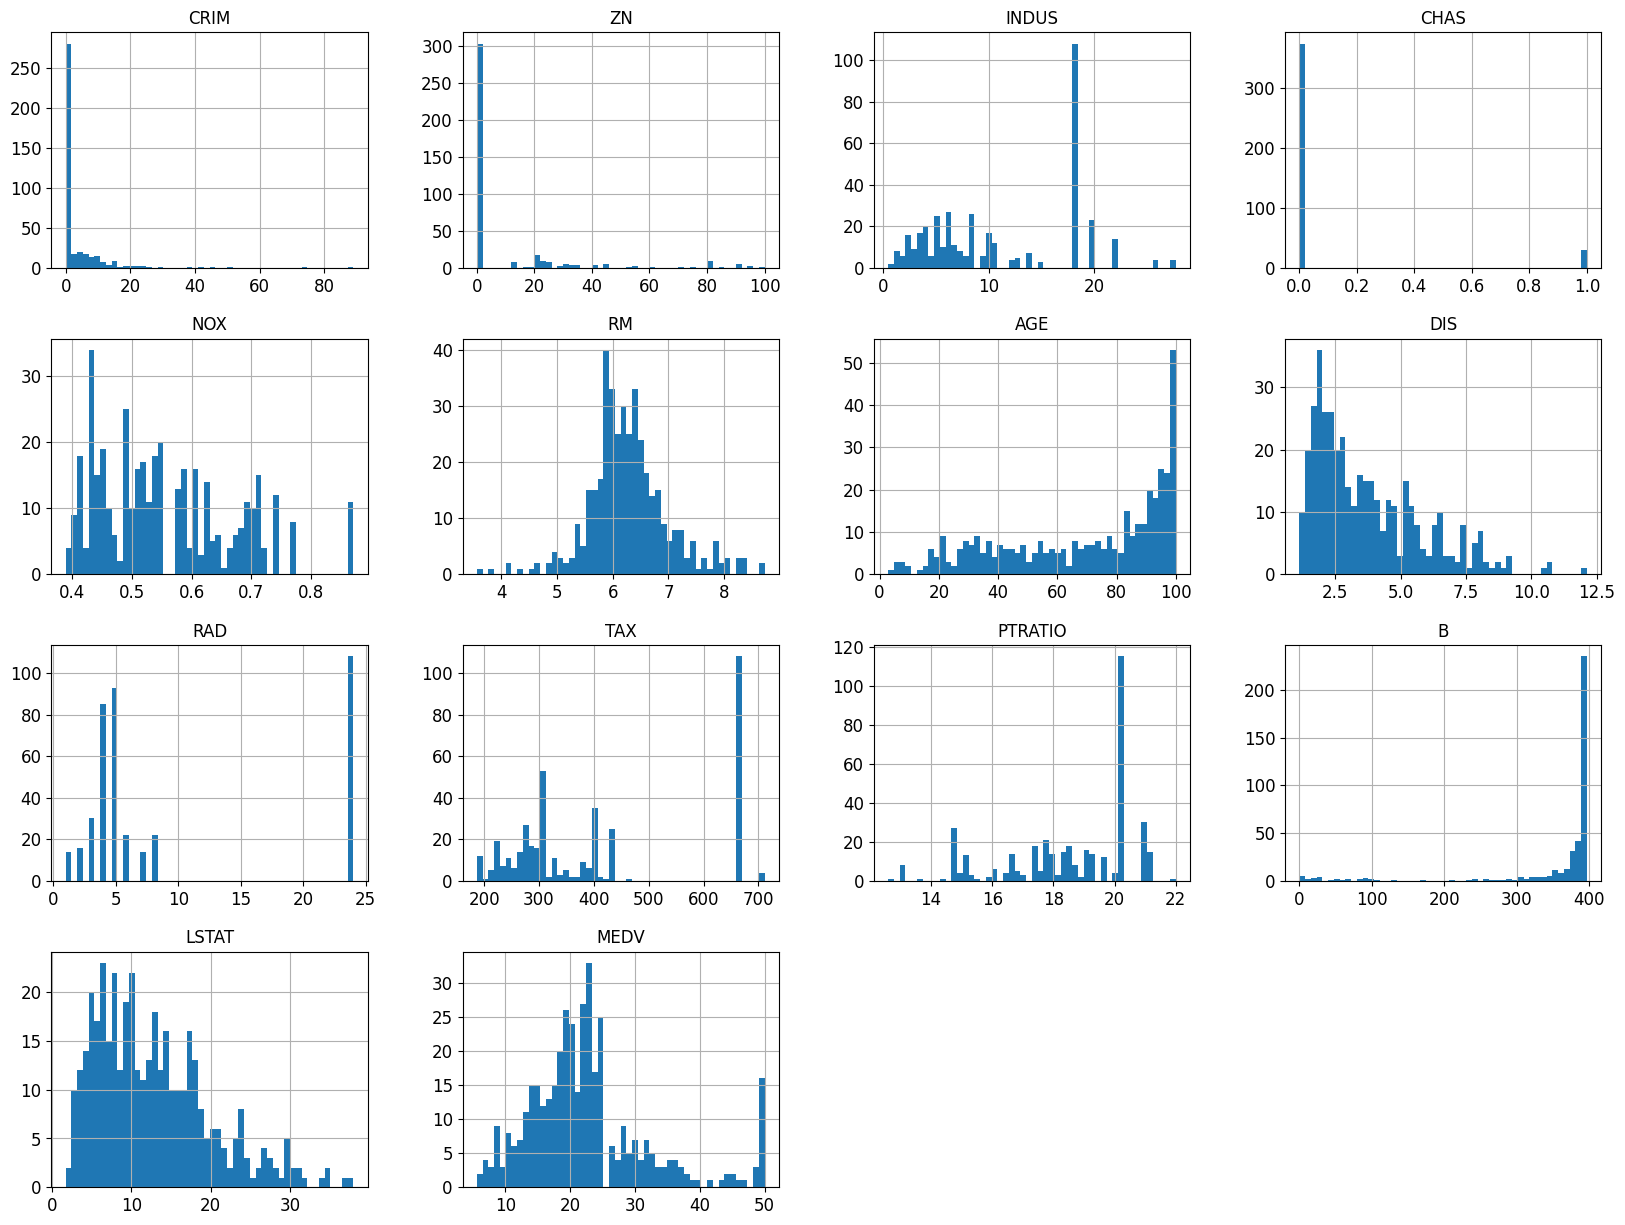

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Para estudar como nossos dados estão relacionados, veja a matriz de correlação abaixo.

In [24]:
corr_matrix = housing.corr()

In [25]:
import seaborn as sea

<Axes: >

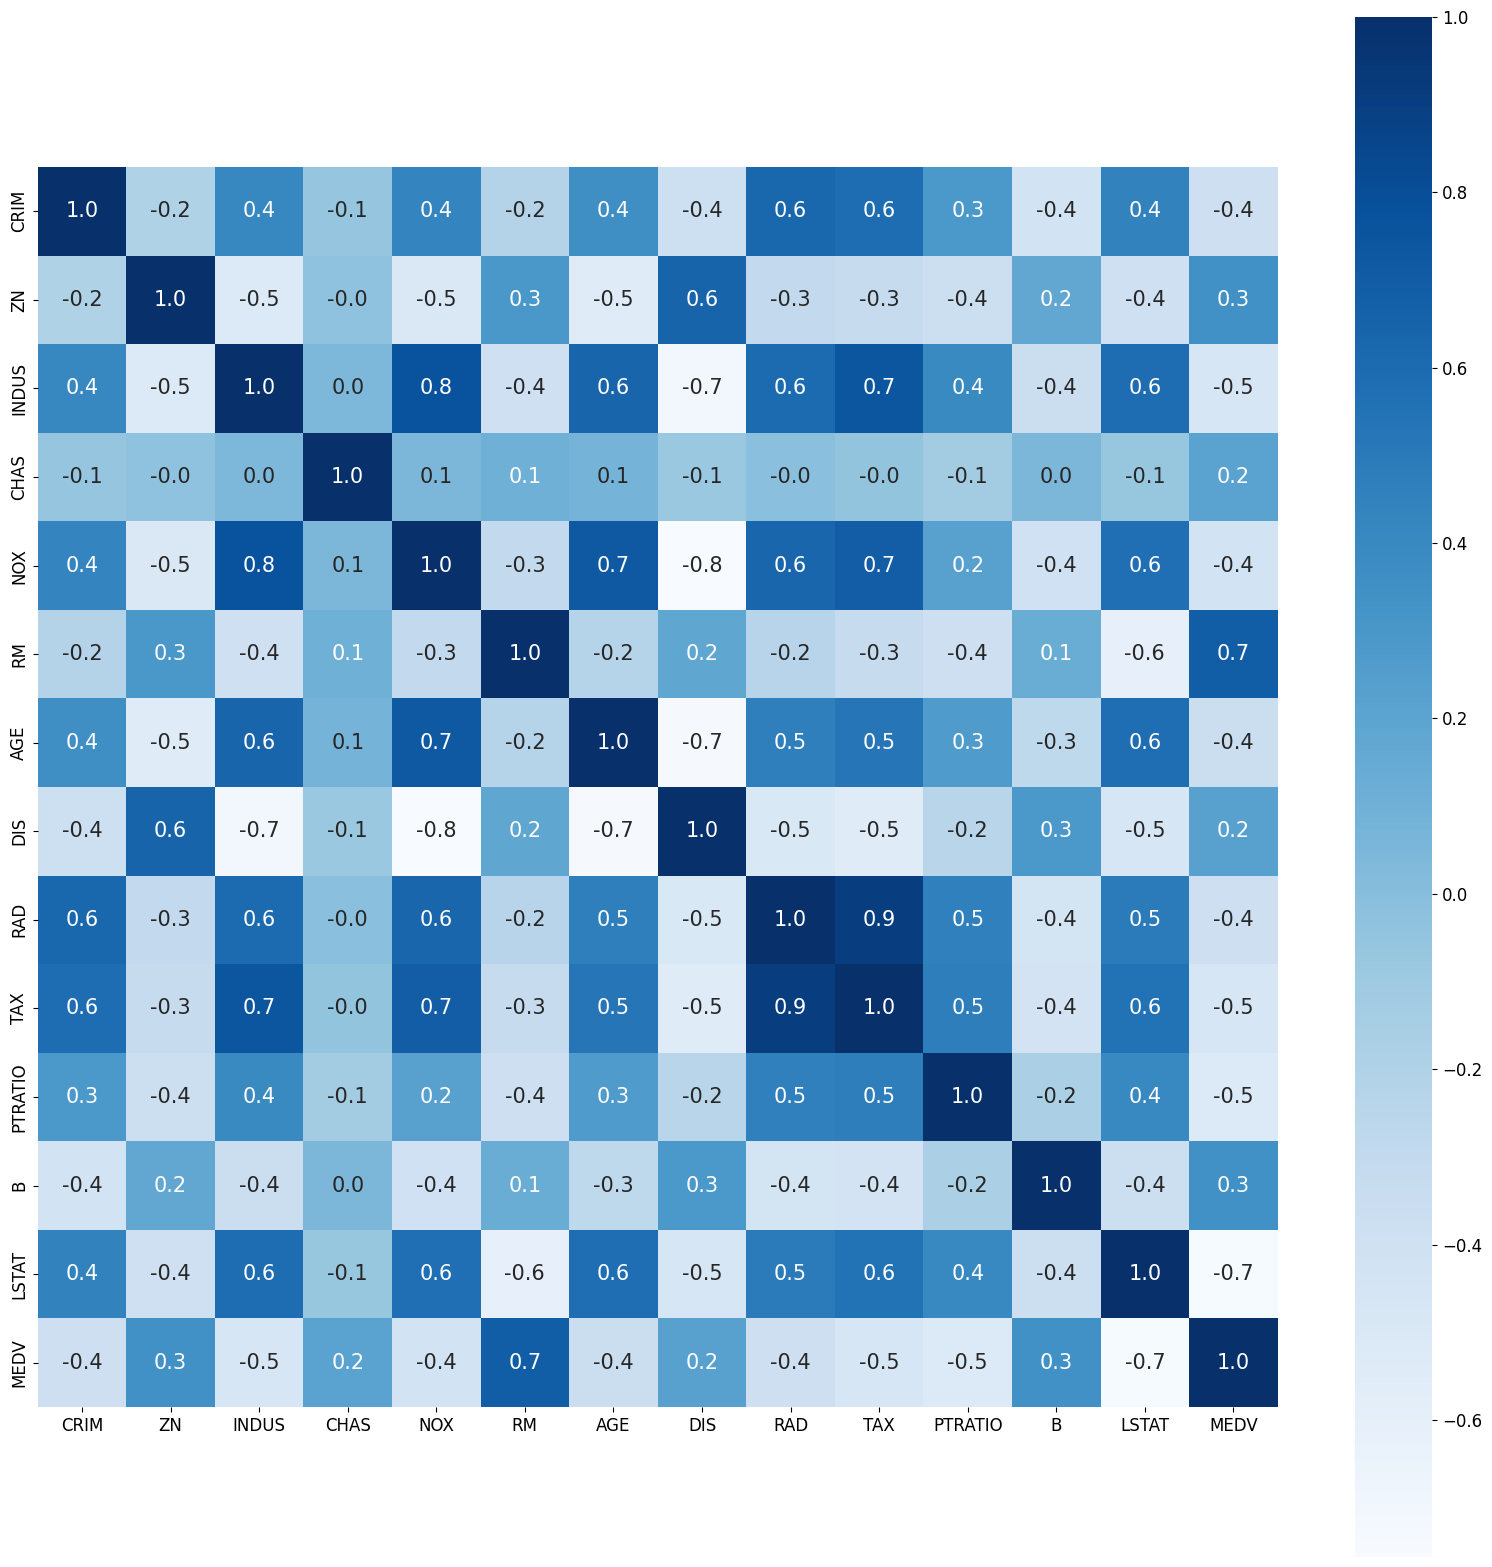

In [26]:
plt.figure(figsize=(20,20))
sea.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

Interessa-nos, em particular, saber quais features estão mais relacionadas com a feature "MEDV", uma vez que queremos aber qual atributo pode influenciar mais significativamente o preço de uma casa.

Note que uma correlação proxima de 1 significa uma forte correação e uma proporção direta. Já um valor próximo de -1 indica uma forte relação mas com proporcionalidade inversa. Valores próximos de 0 indicam baixa relação entre as variaveis.

In [27]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.689105
ZN         0.346955
B          0.342517
DIS        0.224439
CHAS       0.211504
AGE       -0.355283
CRIM      -0.374415
RAD       -0.375340
NOX       -0.423392
TAX       -0.468018
INDUS     -0.469287
PTRATIO   -0.511693
LSTAT     -0.740815
Name: MEDV, dtype: float64

Agora vamos visualizar essa corelação entre features de maneirra diferente: usando a Matriz de Dispersão! Aqui, visualmente (usando o Plot) podemos ver o quão linearmente uma feature se relaciona com a outra. 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>]], dtype=object)

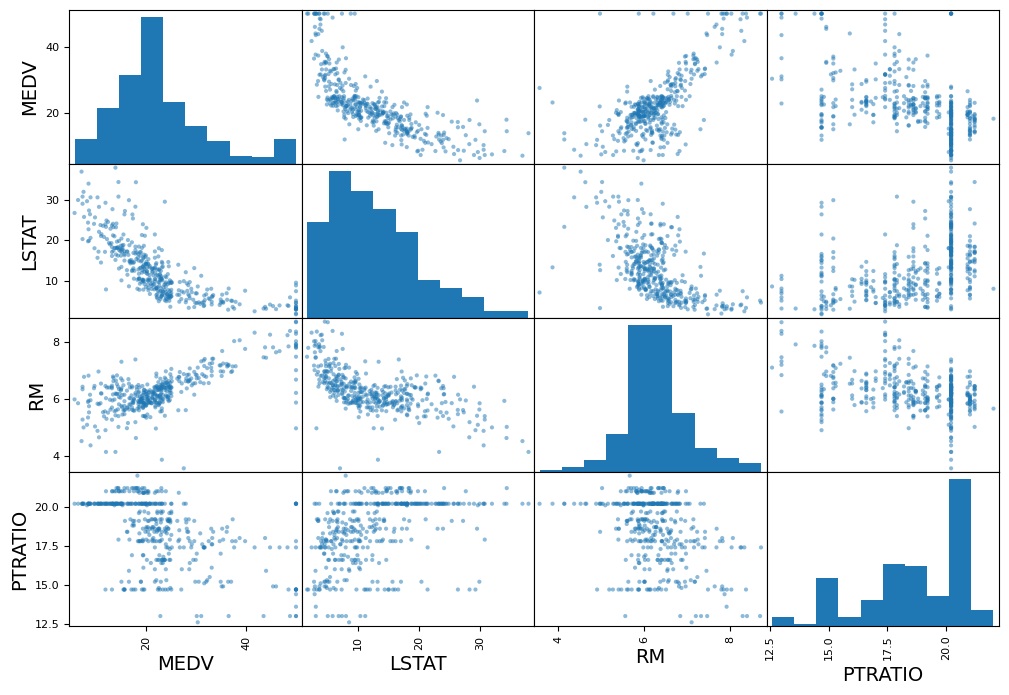

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "LSTAT", "RM",
              "PTRATIO"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Note que, em particular, o LSTAT tem forte relação inversamente proporcional com o preço da casa. Isso faz sentido, uma vez que se temos baixo LSTAT, isso significa que são pessoas de maios status social que, provavelmente, moram em casas mais caras. Podemos visualizar isso abaixo, com a matriz de dispersão que, quando plotada, se assemelha a uma reta de inclinação negativa.

<Axes: xlabel='LSTAT', ylabel='MEDV'>

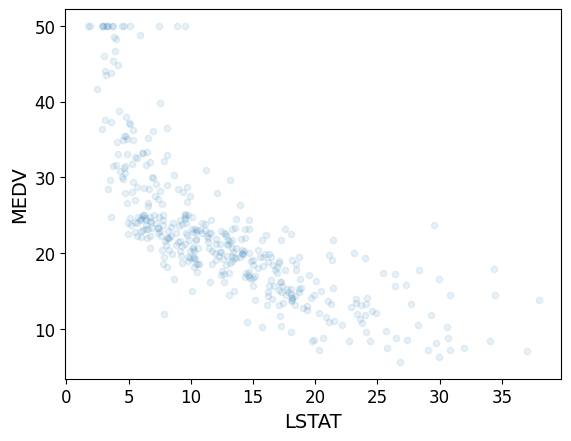

In [29]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV",
             alpha=0.1)

# Feature Engineering #

Ao tentar criar novas variáveis para o nosso modelo, encontramos alguns problemas:

* Nossas features atuais são dificilmente relacionáveis, uma vez que muitos deles são bem específicos.
* Ao relacionar essas variáveis, muitas delas ou nos davam informações redundantes (informações que features anteriores já nos davam) ou uma informação de difícil interpretabilidade (devido a especificidade de algumas das features) ou ainda informações pouco influentes no preço das casas.

Além disso, temos um conjunto muito pequeno de dados, então optamos por não fazer nenhuma feature nova e manter o probema simples.

Abaixo, seguem dois exemplos de features que tentamos implementar.

In [30]:
B_LSTAT=housing["B"]*housing["LSTAT"] #Proporção de pessoas negras em faixas de baixo status da sociedade

Essa feature seria interessante, para medidir dispariedade socioeconômica. Porém esse tipo de informção está, de certa forma, já incluso na feature LSTAT.

In [31]:
DIS_RAD = housing["DIS"]/housing["RAD"] #Distância aos centros de empregos dividida pela acessibilidade às rodovias

Essa feature pode indicar a facilidade de transporte e acesso aos polos de emprego. Porém, ela é de difícil interpretabilidade.

# Preparar os dados para os algoritmos de Machine Learning #

Prieiramente vamos retirar a feature "MEDV" de nosso conjunto de treino, uma vez que o preço da casa serão os nssos rótulos.

In [32]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

Como comentamos anteriormente, não temos nenhum dado faltante (assim não precisamos fazer nenhum tipo de imputação) e todos os dados são numéricos. Vamos então apenas coloca-los em uma mesma escala.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing)

# Selecionar e treinar um modelo #

Vamos treinar três modelos diferentes (Linear Regression, Decision Tree e Random Forest) e depois vamos comparar o desempenho de cada um para escolher o mais adequado.

### Linear regression ###

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_scaled, housing_labels)

LinearRegression()

### Decision Tree ###

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(housing_scaled, housing_labels)

DecisionTreeRegressor(random_state=42)

### Random Forest ###

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=seed) 
rf.fit(housing_scaled, housing_labels)

RandomForestRegressor(random_state=42)

# Avaliação de modelo #

Vamos utilizar a validação cruzada para associar um score à performance de nosso modelos. O score será calculado pelo negative mean squared error. Ela vai funcionar da seguinte forma: vamos separar o conjunto de treinamento em k = 4 pedaços (folds) e fazemos então um loop, em que, para cada fold:

* Treinaremos o modelo no conjunto formado por: treino - fold
* Testaremos o modelo no fold

Ao final, calcularemos uma média dos k testes anteriores.

In [37]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [38]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_scaled, housing_labels,
                             scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.48519801 5.31740003 6.13870058 4.70445489]
Mean: 5.16143837675901
Standard deviation: 0.6413852952766207


### Decision Tree

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_scaled, housing_labels,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [4.30812035 3.95549499 5.77834811 3.85862798]
Mean: 4.475147859479159
Standard deviation: 0.770773144160781


### Random Forest

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, housing_scaled, housing_labels,
                         scoring="neg_mean_squared_error", cv=4)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [3.18948666 2.99367276 3.77315226 2.80203354]
Mean: 3.189586303646377
Standard deviation: 0.36370609354604894


# Ajustando e selecionando o modelo #

Agpra, precisamos testar diversas combinações de parâmetros e hiperparâmetros em nossos modelos e observar como eles performam com nosso conjunto de teste. Faremos a busca pelos melhores parâmetros via Random Search e nosso score será o negative Mean Squared Error.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Linear Regression

Como o Linear Regression não possui hiperparâmetros, podemos aplicar o Random Search da seguinte forma:

In [42]:
from sklearn.pipeline import Pipeline
lr = LinearRegression()


pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', lr) 
])

param_distribs_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

rnd_search_lr = RandomizedSearchCV(
    pipeline_lr,
    param_distributions=param_distribs_lr,
    n_iter=25,
    cv=4,
    scoring='neg_mean_squared_error',  
    random_state=seed
)

rnd_search_lr.fit(housing_scaled, housing_labels)

print("Melhores parâmetros:", rnd_search_lr.best_params_)
print("Melhor score (MSE negativo):", rnd_search_lr.best_score_)

Melhores parâmetros: {'regressor__positive': False, 'regressor__fit_intercept': True}
Melhor score (MSE negativo): -27.05182121407777


c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=25. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### Decision Tree

In [43]:
list = []
list.append(None)
for i in range(1,26):
    list.append(2*i)

for i in range(11,21):
    list.append(5*i)
print(list)

[None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [44]:
dt = DecisionTreeRegressor(random_state=seed) 

param_distribs_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'splitter': ['best', 'random'],  
    'max_depth': list,  
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'min_samples_leaf': [1, 2, 3, 4, 5] 
}

rnd_search_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_distribs_dt,
    n_iter=50,
    cv=4,
    scoring='neg_mean_squared_error',
    random_state=seed
)

rnd_search_dt.fit(housing_scaled, housing_labels)

print("Melhores parâmetros:", rnd_search_dt.best_params_)
print("Melhor score (MSE negativo):", rnd_search_dt.best_score_)

Melhores parâmetros: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 75, 'criterion': 'squared_error'}
Melhor score (MSE negativo): -14.570316459051309


### Random Forest

In [45]:
rf = RandomForestRegressor(random_state=seed)

param_distribs_rf = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rnd_search_rf = RandomizedSearchCV(rf,
                                param_distributions=param_distribs_rf,
                                n_iter=25,
                                cv=4,
                                scoring='neg_mean_squared_error',
                                random_state=seed)

rnd_search_rf.fit(housing_scaled, housing_labels)

print("Melhores parâmetros:", rnd_search_rf.best_params_)
print("Melhor score (MSE negativo):", rnd_search_rf.best_score_)

Melhores parâmetros: {'max_features': 6, 'n_estimators': 89}
Melhor score (MSE negativo): -8.985326244561074


Abaixo, segue as cinco primeiras entradas dos melhores parâmetros dentre os modelos testados e seus erros médios (mean squared errod positivo e negativo) e desvio padrão. Basta observarmos as cinco primerias entradas, pois colocamos a tabela em ordem crescente de acordo com o erro e já conhecemos o erro dos melhores parâmetros dos métodos (calculados acima).

In [46]:
linear_results = pd.DataFrame(rnd_search_lr.cv_results_)
linear_results['Model'] = 'Linear Regression'
linear_results_summary = linear_results[['Model', 
                                          'param_regressor__fit_intercept', 
                                          'param_regressor__positive', 
                                          'mean_test_score', 
                                          'std_test_score']].rename(columns={
    'mean_test_score': 'MSE Negativo',
    'std_test_score': 'Desvio Padrão'
})

linear_results_summary['MSE Positivo'] = -linear_results_summary['MSE Negativo']

# Decision Tree Results
decision_tree_results = pd.DataFrame(rnd_search_dt.cv_results_)
decision_tree_results['Model'] = 'Decision Tree Regressor'
decision_tree_results_summary = decision_tree_results[['Model', 
                                                       'param_criterion', 
                                                       'param_splitter', 
                                                       'param_max_depth', 
                                                       'param_min_samples_split', 
                                                       'param_min_samples_leaf', 
                                                       'mean_test_score', 
                                                       'std_test_score']].rename(columns={
    'mean_test_score': 'MSE Negativo',
    'std_test_score': 'Desvio Padrão'
})

decision_tree_results_summary['MSE Positivo'] = -decision_tree_results_summary['MSE Negativo']

random_forest_results = pd.DataFrame(rnd_search_rf.cv_results_)
random_forest_results["Model"]="Random Forest Regressor"
random_forest_results_summary = random_forest_results[['Model', 
                                          'param_n_estimators',
                                          'param_max_features',
                                          'mean_test_score', 
                                          'std_test_score']].rename(columns={
    'mean_test_score': 'MSE Negativo',
    'std_test_score': 'Desvio Padrão'
})

random_forest_results_summary['MSE Positivo'] = -random_forest_results_summary['MSE Negativo']

final_results = pd.concat([linear_results_summary, decision_tree_results_summary,random_forest_results_summary], ignore_index=True)

final_results = final_results.sort_values(by='MSE Positivo')
final_results.head()

,Model,param_regressor__fit_intercept,param_regressor__positive,MSE Negativo,Desvio Padrão,MSE Positivo,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_n_estimators,param_max_features
68,Random Forest Regressor,NaN,NaN,-8.985326,1.446072,8.985326,NaN,NaN,NaN,NaN,NaN,89.0,6.0
65,Random Forest Regressor,NaN,NaN,-8.992837,1.879815,8.992837,NaN,NaN,NaN,NaN,NaN,130.0,6.0
73,Random Forest Regressor,NaN,NaN,-9.125963,2.062131,9.125963,NaN,NaN,NaN,NaN,NaN,175.0,6.0
72,Random Forest Regressor,NaN,NaN,-9.364275,2.161694,9.364275,NaN,NaN,NaN,NaN,NaN,190.0,7.0
70,Random Forest Regressor,NaN,NaN,-9.386090,2.167725,9.386090,NaN,NaN,NaN,NaN,NaN,170.0,7.0


O melhor modelo (aquele co o menor erro) é o Random Forest  com os parâmetros max_features = 6 e n_estimators = 89. Esse será o modelo escolhido para o teste.

# Modelo e Teste Final

Vamos agora testar nosso método escolhido e treinado (no conjunto treino) no conjunto teste.

In [47]:
from sklearn.metrics import mean_squared_error as MSE

final_model = rnd_search_rf.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = scaler.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [48]:
print(final_rmse)

3.6113885136800032


Tivemos um ótimo resultado. Em média, nosso modelo errou o preço das casas em $3600,00 dólares. Esse erro, quando comparado ao valor das casas, não é muito significativo.

# Conclusão

A escolha do Random Forest foi feliz, uma vez que sua performasse teve um baixo erro de generalização. Algumas possíveis justificativas teóricas para esse resultado são: 
* O Random Forest consegue capturar relações não necessariamente lineares entre os dados. Isso é de extrema importância nesse caso, pois o preço médio das casas provavelmente tem relação não linear com o restante das features. Dessa forma, podemos compreender o desempenho superior ao Linear Regression (que assume relação linear entre os dados); 
* Esse método leva em consideração o impacto das features nos resultados;
* Por fim, o modelo é mais resistente a outliers e ruídos visto que mesmo que esses dados ruidosos afetem algumas árvores individualmente, eles terão pouca relevância em uma floresta inteira. 


# Dificuldades

Seguem abaixo, listadas, as principais dificuldades que encontramos ao realizar o projeto:

* Importação dos dados: Como os dados estavam em um link, encontrar uma biblioteca que nos ajudasse a importar os dados foi um ponto de dificuldade;
* Interpretação das variaveis: Várias das features do problema são bem específicas e são complicadas de interepretar;
* Estratificação dos dados: Ficamos em dúvida quanto a qual(is) feature(s) estratificar. Testamos fazer a estratificação com TAX, mas os resultados não foram satisfatórios. Outro desafio foi encontrar uma forma de estratificar que fosse adequado para nosso conjunto de dados (testamos também a Regra de Sturges).
* Feature engineering: Os desafios quanto a esse tema foram explicados durante o trabalho;
* Folhas na validação cruzada: Devido ao nosso conjunto ser pequeno, ficamos em dúvida quanto ao número de folds para ter na validação cruzada;
* Random Search: Aqui, a maior dificuldade foi entender os hiperparâmetros de cada modelo e criar listas para que o random search testasse combinações. Especificamente para o Linear regression, como ele não possui hiperparâmetros, ficamos um pouco confusos em como lidar com ele no random search.